<a href="https://colab.research.google.com/github/cabrera21hub/Calculadora/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el archivo CSV
data = pd.read_csv('/content/rama_2023_05.csv')

# Convertir la columna de fecha a datetime
data['fecha'] = pd.to_datetime(data['fecha'])

# Seleccionar los objetivos
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']  # Agregar otros contaminantes importantes

# Verificar si las columnas adicionales están presentes en el CSV
for target in targets:
    if target not in data.columns:
        raise ValueError(f"Column '{target}' not found in the CSV file")

# Separar características y objetivos
X = data.drop(columns=['fecha'] + targets)
y = data[targets]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión multivariado
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo para cada objetivo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): [4.35182143 6.36279643 0.31954162 8.39510012 0.08203859 2.17672334]
Root Mean Squared Error (RMSE): [ 6.01683999  8.05705541  0.38728582 10.78037175  0.10356394  3.09091965]
R-squared (R2): [0.50358573 0.21693675 0.99705918 0.56234027 0.75643543 0.21238466]


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el archivo CSV
data = pd.read_csv('/content/rama_2023_05.csv')

# Convertir la columna de fecha a datetime
data['fecha'] = pd.to_datetime(data['fecha'])

# Seleccionar los objetivos
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']

# Verificar si las columnas adicionales están presentes en el CSV
for target in targets:
    if target not in data.columns:
        raise ValueError(f"Column '{target}' not found in the CSV file")

# Separar características y objetivos
X = data.drop(columns=['fecha'] + targets)
y = data[targets]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión multivariado
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo para cada objetivo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): [4.35182143 6.36279643 0.31954162 8.39510012 0.08203859 2.17672334]
Root Mean Squared Error (RMSE): [ 6.01683999  8.05705541  0.38728582 10.78037175  0.10356394  3.09091965]
R-squared (R2): [0.50358573 0.21693675 0.99705918 0.56234027 0.75643543 0.21238466]


In [5]:
pip install meteostat


In [7]:
print(data.columns)


Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')


In [8]:
import pandas as pd
from meteostat import Point, Daily
from datetime import datetime

# Definir la ubicación de la Ciudad de México
cdmx = Point(19.4326, -99.1332)

# Definir el rango de fechas
start = datetime(2015, 1, 1)
end = datetime(2023, 12, 31)

# Obtener datos diarios
data = Daily(cdmx, start, end)
data = data.fetch()

# Verificar las columnas disponibles
print(data.columns)

# Seleccionar las columnas de interés disponibles
columns_of_interest = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']

# Filtrar solo las columnas que están presentes en el DataFrame
available_columns = [col for col in columns_of_interest if col in data.columns]

# Filtrar el DataFrame con las columnas disponibles
data = data[available_columns]

# Renombrar las columnas para mayor claridad (ajustar según disponibilidad)
rename_dict = {'tavg': 'temp_avg', 'tmin': 'temp_min', 'tmax': 'temp_max', 'prcp': 'precipitation', 'wspd': 'wind_speed'}
data = data.rename(columns=rename_dict)

# Restablecer el índice para que la columna de fecha sea una columna normal
data.reset_index(inplace=True)

# Mostrar los primeros registros
print(data.head())


Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')
        time  temp_avg  temp_min  temp_max  precipitation  wind_speed
0 2015-01-13      12.9       3.0      22.3            0.0         NaN
1 2015-01-14       NaN       NaN       NaN            NaN         NaN
2 2015-01-15       NaN       NaN       NaN            NaN         NaN
3 2015-01-16       NaN       NaN       NaN            NaN         NaN
4 2015-01-17       NaN       NaN       NaN            NaN         NaN


In [9]:
# Eliminar filas con datos faltantes
data.dropna(inplace=True)

# Mostrar los primeros registros después de eliminar filas con NaN
print(data.head())


           time  temp_avg  temp_min  temp_max  precipitation  wind_speed
822  2017-04-14      18.0      11.0      24.0            0.0        12.9
1185 2018-04-12      17.5      14.0      22.0            0.0        14.4
1193 2018-04-20      19.9      12.0      27.0            0.0        10.4
1218 2018-05-15      20.4      14.0      28.0            0.0        13.4
1278 2018-07-14      16.1      13.0      21.0           26.2         9.9


In [10]:
# Rellenar los datos faltantes con la media de la columna
data.fillna(data.mean(), inplace=True)

# Mostrar los primeros registros después de rellenar los NaN
print(data.head())


           time  temp_avg  temp_min  temp_max  precipitation  wind_speed
822  2017-04-14      18.0      11.0      24.0            0.0        12.9
1185 2018-04-12      17.5      14.0      22.0            0.0        14.4
1193 2018-04-20      19.9      12.0      27.0            0.0        10.4
1218 2018-05-15      20.4      14.0      28.0            0.0        13.4
1278 2018-07-14      16.1      13.0      21.0           26.2         9.9


In [11]:
# Rellenar los datos faltantes con el valor anterior
data.fillna(method='ffill', inplace=True)

# Rellenar los datos faltantes con el valor siguiente
data.fillna(method='bfill', inplace=True)

# Mostrar los primeros registros después de rellenar los NaN
print(data.head())


           time  temp_avg  temp_min  temp_max  precipitation  wind_speed
822  2017-04-14      18.0      11.0      24.0            0.0        12.9
1185 2018-04-12      17.5      14.0      22.0            0.0        14.4
1193 2018-04-20      19.9      12.0      27.0            0.0        10.4
1218 2018-05-15      20.4      14.0      28.0            0.0        13.4
1278 2018-07-14      16.1      13.0      21.0           26.2         9.9


In [15]:
import pandas as pd
from meteostat import Point, Daily
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir la ubicación de la Ciudad de México
cdmx = Point(19.4326, -99.1332)

# Definir el rango de fechas
start = datetime(2015, 1, 1)
end = datetime(2023, 12, 31)

# Obtener datos diarios
data = Daily(cdmx, start, end)
data = data.fetch()

# Seleccionar las columnas de interés disponibles
columns_of_interest = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']
data = data[columns_of_interest]

# Renombrar las columnas para mayor claridad
rename_dict = {'tavg': 'temp_avg', 'tmin': 'temp_min', 'tmax': 'temp_max', 'prcp': 'precipitation', 'wspd': 'wind_speed'}
data = data.rename(columns=rename_dict)

# Restablecer el índice para que la columna de fecha sea una columna normal
data.reset_index(inplace=True)

# Imputar datos faltantes usando la media de cada columna
data.fillna(data.mean(), inplace=True)

# Mostrar los primeros registros después de la imputación
print(data.head())

# Cargar los datos de calidad del aire
air_quality_data = pd.read_csv('/content/rama_2023_05.csv')
air_quality_data['fecha'] = pd.to_datetime(air_quality_data['fecha'])

# Unir los DataFrames en función de la columna de fecha
merged_data = pd.merge(air_quality_data, data, left_on='fecha', right_on='time', how='left')
merged_data.drop(columns=['time'], inplace=True)

# Mostrar los primeros registros del DataFrame unido
print(merged_data.head())

# Seleccionar los objetivos
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']
X = merged_data.drop(columns=['fecha'] + targets)
y = merged_data[targets]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión multivariado
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo para cada objetivo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


        time   temp_avg   temp_min   temp_max  precipitation  wind_speed
0 2015-01-13  12.900000   3.000000  22.300000       0.000000   11.018854
1 2015-01-14  18.002803  12.209207  24.436663       2.593226   11.018854
2 2015-01-15  18.002803  12.209207  24.436663       2.593226   11.018854
3 2015-01-16  18.002803  12.209207  24.436663       2.593226   11.018854
4 2015-01-17  18.002803  12.209207  24.436663       2.593226   11.018854
       fecha        CO         NO        NO2        NOX         O3  \
0 2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150   
1 2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366   
2 2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486   
3 2015-01-04  0.726940  24.606272  19.560976  44.165505  17.329032   
4 2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588   

         PM10       PM25        SO2  temp_avg  temp_min  temp_max  \
0  105.573684  78.953405  11.554723       NaN       NaN       NaN   
1  

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from meteostat import Point, Daily
from datetime import datetime

# Definir la ubicación de la Ciudad de México
cdmx = Point(19.4326, -99.1332)

# Definir el rango de fechas
start = datetime(2015, 1, 1)
end = datetime(2023, 12, 31)

# Obtener datos diarios
data = Daily(cdmx, start, end)
data = data.fetch()

# Seleccionar las columnas de interés disponibles
columns_of_interest = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']
data = data[columns_of_interest]

# Renombrar las columnas para mayor claridad
rename_dict = {'tavg': 'temp_avg', 'tmin': 'temp_min', 'tmax': 'temp_max', 'prcp': 'precipitation', 'wspd': 'wind_speed'}
data = data.rename(columns=rename_dict)

# Restablecer el índice para que la columna de fecha sea una columna normal
data.reset_index(inplace=True)

# Imputar datos faltantes usando la media de cada columna
data.fillna(data.mean(), inplace=True)

# Mostrar los primeros registros después de la imputación
print(data.head())

# Cargar los datos de calidad del aire
air_quality_data = pd.read_csv('/content/rama_2023_05.csv')
air_quality_data['fecha'] = pd.to_datetime(air_quality_data['fecha'])

# Unir los DataFrames en función de la columna de fecha
merged_data = pd.merge(air_quality_data, data, left_on='fecha', right_on='time', how='left')
merged_data.drop(columns=['time'], inplace=True)

# Eliminar registros con valores faltantes en las columnas de interés
merged_data.dropna(subset=['temp_avg', 'temp_min', 'temp_max', 'precipitation', 'wind_speed'], inplace=True)

# Mostrar los primeros registros del DataFrame unido
print(merged_data.head())

# Seleccionar los objetivos
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']
X = merged_data.drop(columns=['fecha'] + targets)
y = merged_data[targets]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión multivariado
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo para cada objetivo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


        time   temp_avg   temp_min   temp_max  precipitation  wind_speed
0 2015-01-13  12.900000   3.000000  22.300000       0.000000   11.018854
1 2015-01-14  18.002803  12.209207  24.436663       2.593226   11.018854
2 2015-01-15  18.002803  12.209207  24.436663       2.593226   11.018854
3 2015-01-16  18.002803  12.209207  24.436663       2.593226   11.018854
4 2015-01-17  18.002803  12.209207  24.436663       2.593226   11.018854
        fecha        CO         NO        NO2        NOX         O3  \
12 2015-01-13  1.115192  30.266102  41.313559  71.577966  36.216885   
13 2015-01-14  1.030712  25.475166  37.829470  63.299669  29.798859   
14 2015-01-15  1.053160  29.606557  38.275410  67.895082  35.104816   
15 2015-01-16  0.931296  22.717822  36.247525  58.960396  32.616361   
16 2015-01-17  0.975636  20.871961  38.374392  59.278768  36.398045   

         PM10       PM25       SO2   temp_avg   temp_min   temp_max  \
12  73.116390  38.203077  6.075472  12.900000   3.000000  22.300

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1

# Generar datos de ejemplo (reemplaza con tus propios datos)
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Inicializar un estimador de regresión lineal
estimator = LinearRegression()

# Inicializar RFE y especificar el número de características a seleccionar
rfe = RFE(estimator, n_features_to_select=5, step=1)

# Ajustar RFE
rfe.fit(X, y)

# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(rfe.support_)
print("Ranking de características:")
print(rfe.ranking_)


Características seleccionadas:
[ True  True  True  True  True False False False False False]
Ranking de características:
[1 1 1 1 1 2 3 6 5 4]


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from meteostat import Point, Daily
from datetime import datetime


In [23]:
# Definir la ubicación de la Ciudad de México
cdmx = Point(19.4326, -99.1332)

# Definir el rango de fechas
start = datetime(2015, 1, 1)
end = datetime(2023, 12, 31)

# Obtener datos diarios
data = Daily(cdmx, start, end)
data = data.fetch()

# Seleccionar las columnas de interés disponibles
columns_of_interest = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']
data = data[columns_of_interest]

# Renombrar las columnas para mayor claridad
rename_dict = {'tavg': 'temp_avg', 'tmin': 'temp_min', 'tmax': 'temp_max', 'prcp': 'precipitation', 'wspd': 'wind_speed'}
data = data.rename(columns=rename_dict)

# Restablecer el índice para que la columna de fecha sea una columna normal
data.reset_index(inplace=True)

# Imputar datos faltantes usando la media de cada columna
data.fillna(data.mean(), inplace=True)

# Mostrar los primeros registros después de la imputación
print(data.head())


        time   temp_avg   temp_min   temp_max  precipitation  wind_speed
0 2015-01-13  12.900000   3.000000  22.300000       0.000000   11.018854
1 2015-01-14  18.002803  12.209207  24.436663       2.593226   11.018854
2 2015-01-15  18.002803  12.209207  24.436663       2.593226   11.018854
3 2015-01-16  18.002803  12.209207  24.436663       2.593226   11.018854
4 2015-01-17  18.002803  12.209207  24.436663       2.593226   11.018854


In [24]:
# Cargar los datos de calidad del aire
air_quality_data = pd.read_csv('/content/rama_2023_05.csv')
air_quality_data['fecha'] = pd.to_datetime(air_quality_data['fecha'])

# Unir los DataFrames en función de la columna de fecha
merged_data = pd.merge(air_quality_data, data, left_on='fecha', right_on='time', how='left')
merged_data.drop(columns=['time'], inplace=True)

# Eliminar registros con valores faltantes en las columnas de interés
merged_data.dropna(subset=['temp_avg', 'temp_min', 'temp_max', 'precipitation', 'wind_speed'], inplace=True)

# Mostrar los primeros registros del DataFrame unido
print(merged_data.head())


        fecha        CO         NO        NO2        NOX         O3  \
12 2015-01-13  1.115192  30.266102  41.313559  71.577966  36.216885   
13 2015-01-14  1.030712  25.475166  37.829470  63.299669  29.798859   
14 2015-01-15  1.053160  29.606557  38.275410  67.895082  35.104816   
15 2015-01-16  0.931296  22.717822  36.247525  58.960396  32.616361   
16 2015-01-17  0.975636  20.871961  38.374392  59.278768  36.398045   

         PM10       PM25       SO2   temp_avg   temp_min   temp_max  \
12  73.116390  38.203077  6.075472  12.900000   3.000000  22.300000   
13  69.590000  36.685976  8.080952  18.002803  12.209207  24.436663   
14  66.869048  32.695122  3.537618  18.002803  12.209207  24.436663   
15  63.411483  29.793210  4.170472  18.002803  12.209207  24.436663   
16  72.256532  38.903727  3.959701  18.002803  12.209207  24.436663   

    precipitation  wind_speed  
12       0.000000   11.018854  
13       2.593226   11.018854  
14       2.593226   11.018854  
15       2.593226 

In [25]:
# Seleccionar los objetivos
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']
X = merged_data.drop(columns=['fecha'] + targets)
y = merged_data[targets]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [27]:
# Entrenar un modelo de regresión multivariado
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo para cada objetivo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): [3.92859385 4.76365497 0.29905888 6.90244839 0.08018832 2.10635037]
Root Mean Squared Error (RMSE): [5.51140699 6.18798395 0.370725   9.26739089 0.10006753 3.29799123]
R-squared (R2): [0.59990759 0.5079023  0.99713331 0.65848751 0.76855319 0.2098323 ]


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo y los parámetros para Grid Search
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30]
}

model = MultiOutputRegressor(RandomForestRegressor())
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Entrenar el modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por Grid Search
best_model = grid_search.best_estimator_

# Hacer predicciones y evaluar el mejor modelo
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): [4.02362061 4.67482094 0.46499385 6.86395525 0.05171669 2.03275314]
Root Mean Squared Error (RMSE): [5.5674347  6.13698995 0.82113404 9.23131682 0.07203662 3.21458373]
R-squared (R2): [0.59173175 0.51597944 0.98593612 0.66114107 0.88005793 0.24929421]


In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo y los parámetros para Grid Search
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 6, 9],
    'estimator__learning_rate': [0.01, 0.1, 0.2]
}

model = MultiOutputRegressor(XGBRegressor())
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Entrenar el modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por Grid Search
best_model = grid_search.best_estimator_

# Hacer predicciones y evaluar el mejor modelo
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): [3.88997912 4.41757581 0.46998166 6.64925619 0.04897005 1.97296144]
Root Mean Squared Error (RMSE): [5.45648503 5.8669478  0.80492041 8.94463742 0.0683312  3.08082121]
R-squared (R2): [0.60784182 0.55763839 0.98648603 0.68186086 0.89207975 0.31046984]


         feature  importance
1            NOX    0.302094
4       temp_max    0.258296
2       temp_avg    0.136008
0             NO    0.101837
6     wind_speed    0.096075
3       temp_min    0.058878
5  precipitation    0.046813


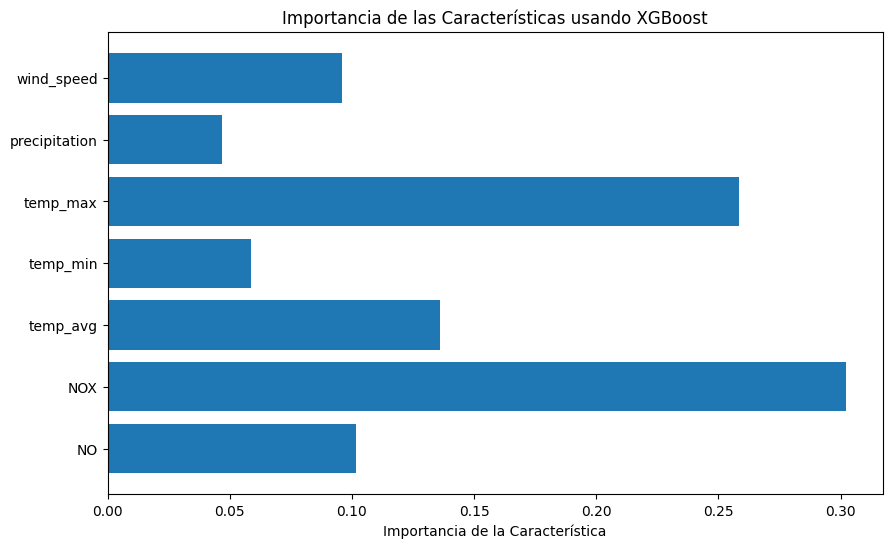

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características del mejor modelo
feature_importances = best_model.estimators_[0].feature_importances_

# Crear un DataFrame para visualizar
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Mostrar la importancia de las características
print(feature_importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de las Características usando XGBoost')
plt.show()


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datos de calidad del aire (ya cargados y preprocesados como en tus pasos anteriores)
# merged_data

# Seleccionar las características más importantes
selected_features = ['NOX', 'temp_max', 'temp_avg', 'NO', 'wind_speed', 'temp_min', 'precipitation']
X = merged_data[selected_features]
y = merged_data[targets]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar un modelo XGBoost con las características seleccionadas
model = MultiOutputRegressor(XGBRegressor(random_state=42))
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo para cada objetivo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): [4.17844132 4.85500036 0.4699198  7.35474058 0.05520627 2.13519719]
Root Mean Squared Error (RMSE): [5.81803838 6.51924333 0.87217582 9.80536172 0.07527883 3.25843825]
R-squared (R2): [0.55415027 0.45380545 0.98413335 0.61768718 0.86901832 0.22867169]


In [34]:
import joblib

# Guardar el modelo
joblib.dump(model, 'best_air_quality_model_selected_features.pkl')


['best_air_quality_model_selected_features.pkl']

In [37]:
print(merged_data.columns)


Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2', 'temp_avg',
       'temp_min', 'temp_max', 'precipitation', 'wind_speed'],
      dtype='object')


In [65]:
import pandas as pd

# Cargar los datos de 2023
df_2023 = pd.read_csv('/content/rama_2023_05.csv')

# Verificar las columnas disponibles en el DataFrame
print(df_2023.columns)

# Convertir la columna 'fecha' a datetime si no está en ese formato
df_2023['fecha'] = pd.to_datetime(df_2023['fecha'])

# Crear una columna 'datetime' si la columna 'fecha' no tiene información de hora
df_2023['datetime'] = df_2023['fecha'].dt.normalize()  # Normalizar para eliminar la hora si existe

# Eliminar columnas innecesarias y reordenar si es necesario
df_2023 = df_2023.drop(columns=['fecha'])  # Eliminar la columna original 'fecha' si no se necesita
df_2023 = df_2023[['datetime'] + [col for col in df_2023.columns if col != 'datetime']]  # Reordenar si es necesario

# Renombrar columnas para que coincidan con los datos de 2018 si es necesario
df_2023 = df_2023.rename(columns={
    'co': 'CO', 'no': 'NO', 'no2': 'NO2', 'nox': 'NOX', 'o3': 'O3', 'pm10': 'PM10', 'pm25': 'PM25', 'so2': 'SO2'
})

# Revisar los primeros registros del DataFrame 2023 para asegurarnos de que todo esté correcto
print(df_2023.head())


Index(['fecha', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2'], dtype='object')
    datetime        CO         NO        NO2        NOX         O3  \
0 2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150   
1 2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366   
2 2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486   
3 2015-01-04  0.726940  24.606272  19.560976  44.165505  17.329032   
4 2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588   

         PM10       PM25        SO2  
0  105.573684  78.953405  11.554723  
1   36.687845  15.449438   1.895052  
2   29.269022  12.915129   1.436937  
3   39.961538  16.838284   1.809061  
4   31.855643  12.667774   8.315789  


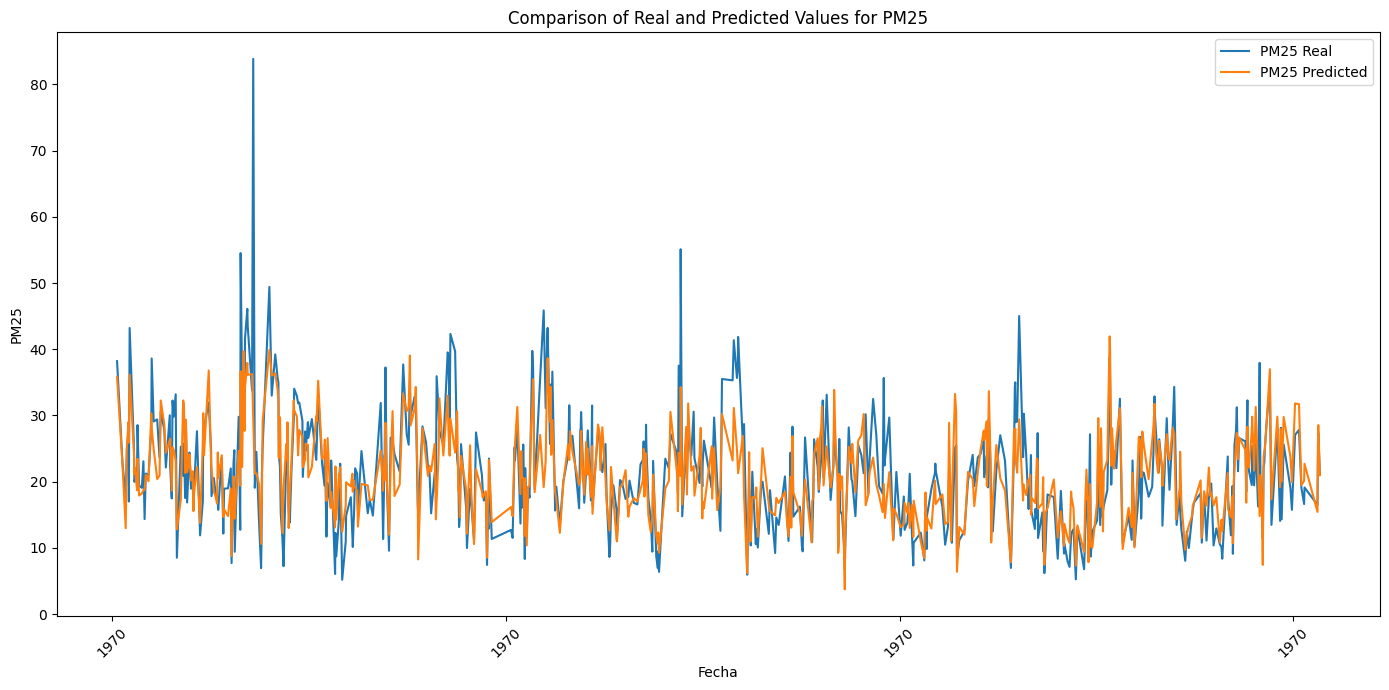

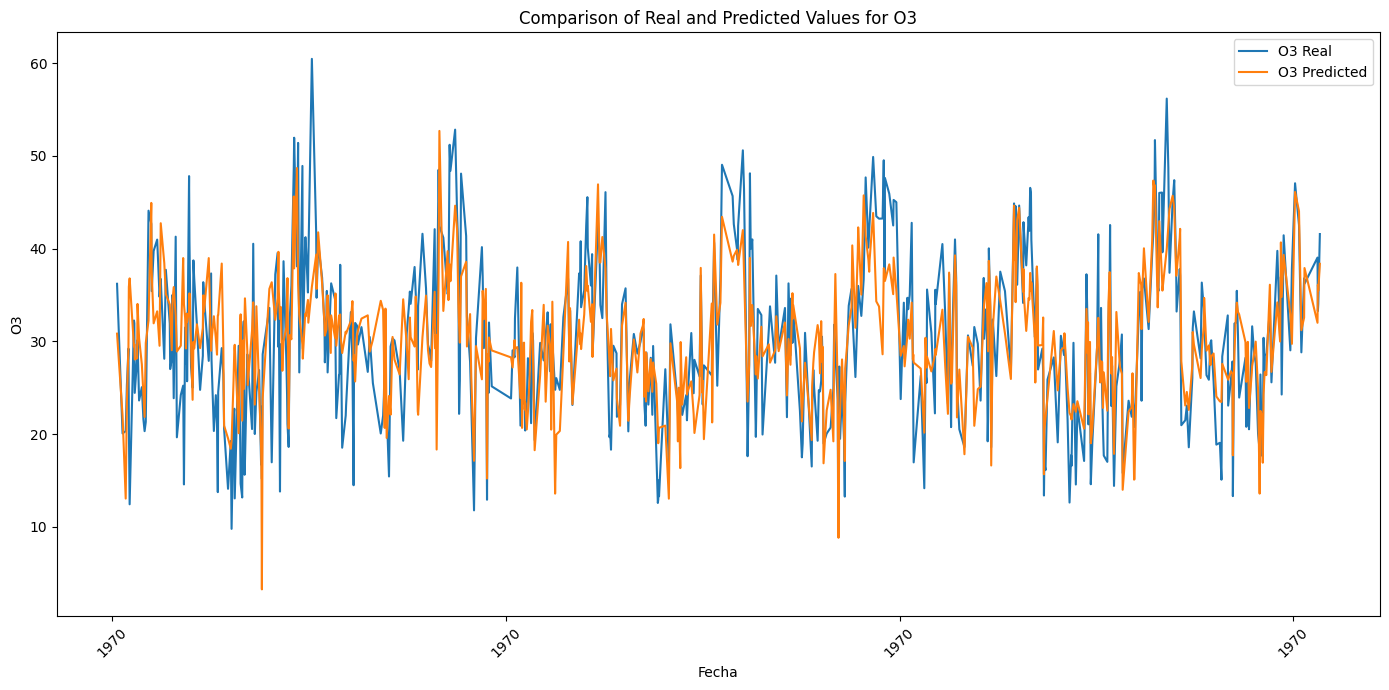

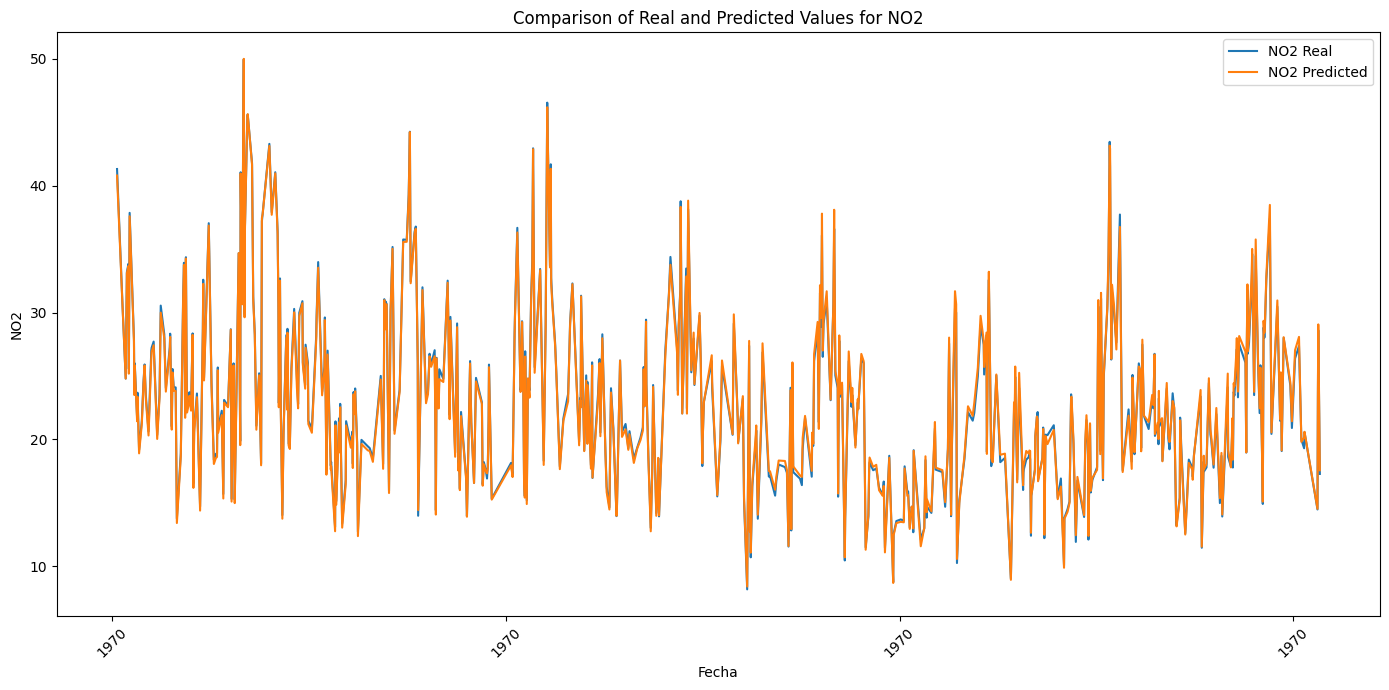

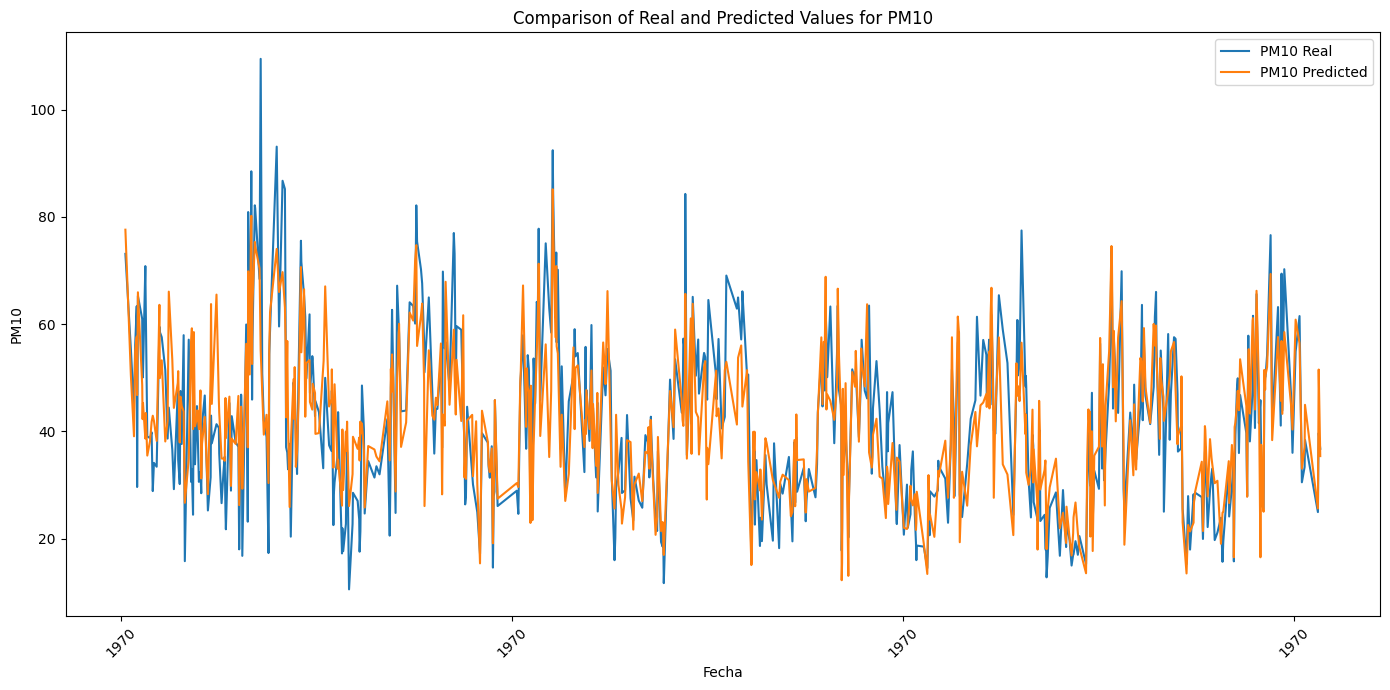

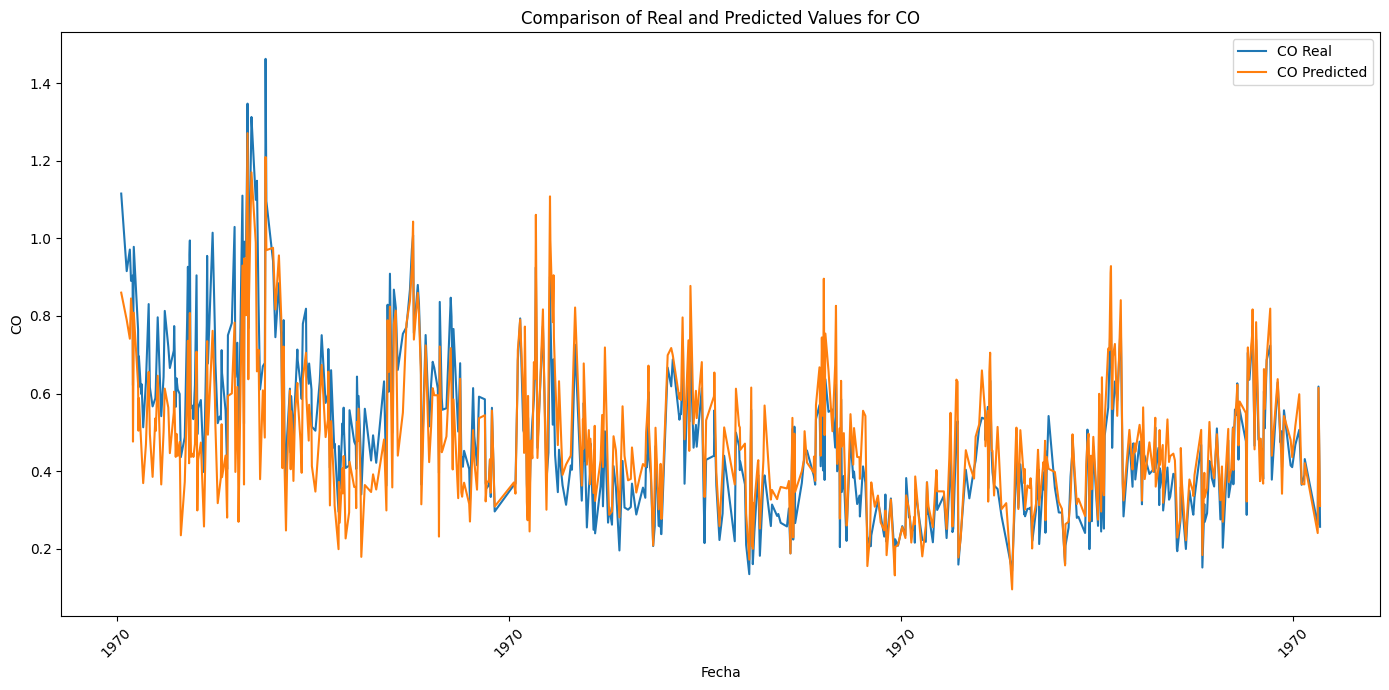

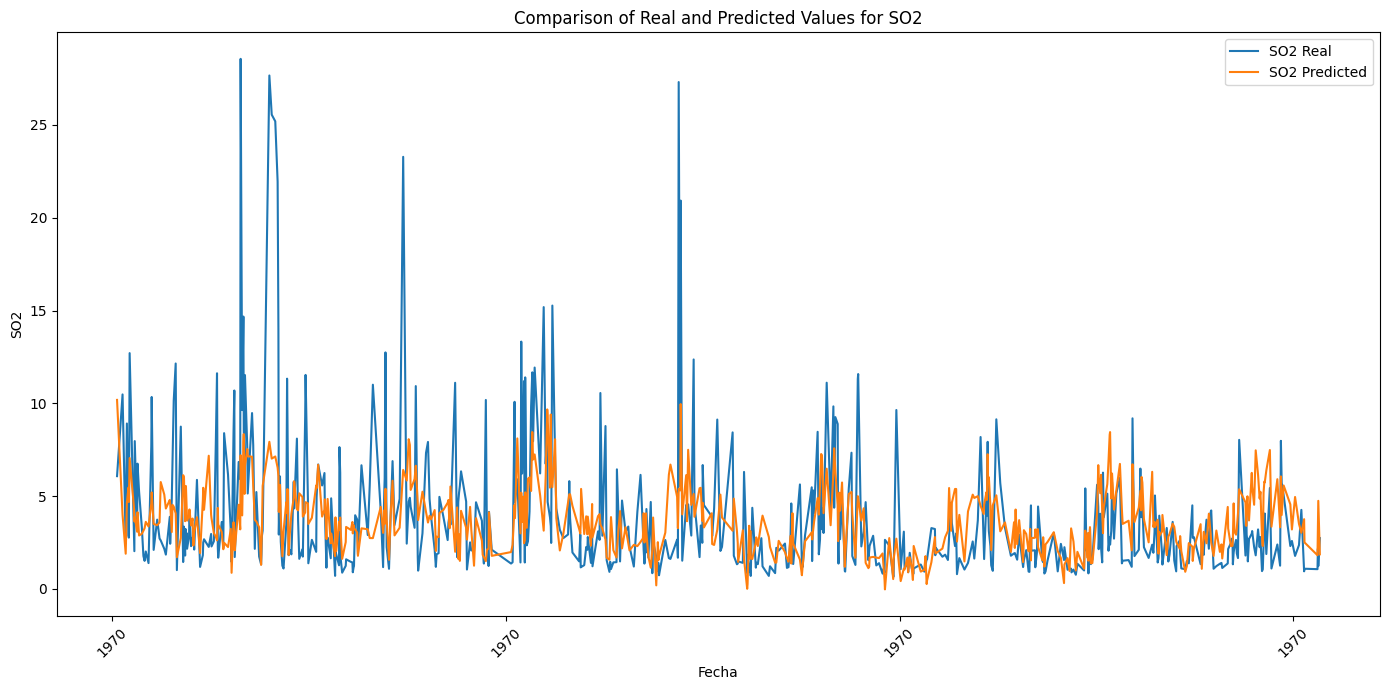

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que `comparison_df` ya tiene las columnas '{target}_real' y '{target}_pred'

# Graficar los valores reales y predichos por año
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']

for target in targets:
    plt.figure(figsize=(14, 7))  # Tamaño de la figura
    sns.lineplot(data=comparison_df, x='fecha', y=f'{target}_real', label=f'{target} Real')  # Gráfico de valores reales
    sns.lineplot(data=comparison_df, x='fecha', y=f'{target}_pred', label=f'{target} Predicted')  # Gráfico de valores predichos
    plt.title(f'Comparison of Real and Predicted Values for {target}')  # Título del gráfico
    plt.xlabel('Fecha')  # Etiqueta del eje x
    plt.ylabel(target)  # Etiqueta del eje y
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad si es necesario
    plt.legend()  # Mostrar leyenda
    plt.tight_layout()  # Ajustar diseño
    plt.show()  # Mostrar gráfico


In [60]:
# Imprimir las primeras filas del DataFrame y listar columnas
print(comparison_df.head())
print(comparison_df.columns)


                               PM25_real    O3_real   NO2_real  PM10_real  \
fecha                                                                       
1970-01-01 00:00:00.000001777  10.894531  16.511940  17.066543  27.725857   
1970-01-01 00:00:00.000000215  27.626632  31.724928  23.625000  46.708502   
1970-01-01 00:00:00.000001368  14.337662  28.235736  13.033473  23.650602   
1970-01-01 00:00:00.000001463  27.566586  24.922164  38.135542  65.099404   
1970-01-01 00:00:00.000001589  37.017493  38.793249  21.580093  60.720109   

                                CO_real  SO2_real  PM25_pred    O3_pred  \
fecha                                                                     
1970-01-01 00:00:00.000001777  0.390208  5.474227  10.829760  19.359098   
1970-01-01 00:00:00.000000215  0.583302  5.874791  22.212617  31.847317   
1970-01-01 00:00:00.000001368  0.207026  4.684641  12.373618  28.099189   
1970-01-01 00:00:00.000001463  0.715211  4.555878  31.819498  24.776988   
1970-01-01

In [66]:
# Suponiendo que 'df_2023' es tu DataFrame con los datos de 2023

# Verificar las fechas únicas en la columna 'datetime'
fechas_unicas = df_2023['datetime'].unique()

# Mostrar las fechas únicas
print(fechas_unicas)


<DatetimeArray>
['2015-01-01 00:00:00', '2015-01-02 00:00:00', '2015-01-03 00:00:00',
 '2015-01-04 00:00:00', '2015-01-05 00:00:00', '2015-01-06 00:00:00',
 '2015-01-07 00:00:00', '2015-01-08 00:00:00', '2015-01-09 00:00:00',
 '2015-01-10 00:00:00',
 ...
 '2023-05-22 00:00:00', '2023-05-23 00:00:00', '2023-05-24 00:00:00',
 '2023-05-25 00:00:00', '2023-05-26 00:00:00', '2023-05-27 00:00:00',
 '2023-05-28 00:00:00', '2023-05-29 00:00:00', '2023-05-30 00:00:00',
 '2023-05-31 00:00:00']
Length: 3073, dtype: datetime64[ns]


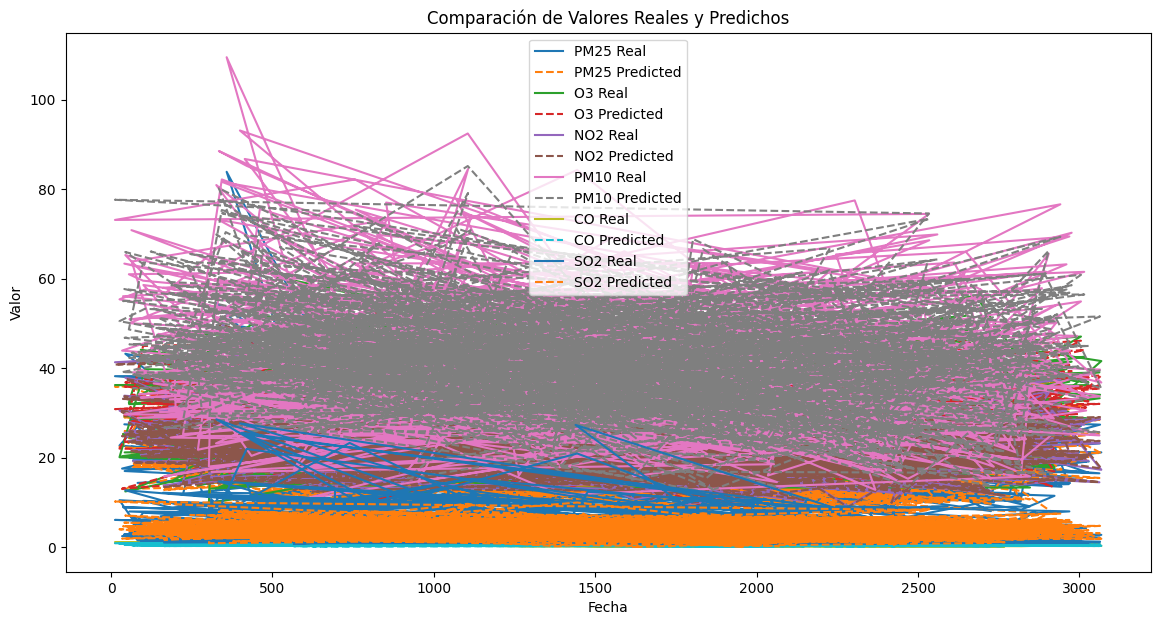

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supongamos que ya tienes X_scaled, y y cargados y divididos en X_train, X_test, y_train, y_test

# Entrenar un modelo de regresión multivariado
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir y_test y y_pred en DataFrames con fechas como índice si es necesario
y_test_df = pd.DataFrame(y_test, columns=targets, index=y_test.index)
y_pred_df = pd.DataFrame(y_pred, columns=targets, index=y_test.index)

# Graficar los valores reales y predichos
plt.figure(figsize=(14, 7))
for target in targets:
    plt.plot(y_test_df.index, y_test_df[target], label=f'{target} Real')
    plt.plot(y_test_df.index, y_pred_df[target], label=f'{target} Predicted', linestyle='dashed')

plt.title('Comparación de Valores Reales y Predichos')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [68]:
# Calcular métricas de rendimiento
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): [3.92859385 4.76365497 0.29905888 6.90244839 0.08018832 2.10635037]
Root Mean Squared Error (RMSE): [5.51140699 6.18798395 0.370725   9.26739089 0.10006753 3.29799123]
R-squared (R2): [0.59990759 0.5079023  0.99713331 0.65848751 0.76855319 0.2098323 ]


In [69]:
print(merged_data.columns)

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2', 'temp_avg',
       'temp_min', 'temp_max', 'precipitation', 'wind_speed'],
      dtype='object')


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Seleccionar las características y los objetivos
features = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2', 'temp_avg', 'temp_min', 'temp_max', 'precipitation', 'wind_speed']
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']

X = merged_data[features]
y = merged_data[targets]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión multivariado
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): [2.51774375e+00 1.51642338e-14 3.72948002e-15 1.38776067e-14
 1.00608302e-16 2.67793763e-15]
Root Mean Squared Error (RMSE): [3.39470156e+00 1.92220046e-14 4.68334059e-15 1.79797337e-14
 1.38419718e-16 3.79013224e-15]
R-squared (R2): [0.84821161 1.         1.         1.         1.         1.        ]


In [71]:
from sklearn.model_selection import cross_val_score

# Define tu modelo
model = MultiOutputRegressor(LinearRegression())

# Realiza la validación cruzada K-fold con 5 folds
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Calcula el promedio de los scores obtenidos
mean_mae = -scores.mean()
print(f"Mean Cross-Validated MAE: {mean_mae}")


Mean Cross-Validated MAE: 0.42391225861591125


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Crear un modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluar el modelo utilizando validación cruzada
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mean_mae = -scores.mean()
print("Mean Cross-Validated MAE (Random Forest):", mean_mae)


Mean Cross-Validated MAE (Random Forest): 1.0330377163824205


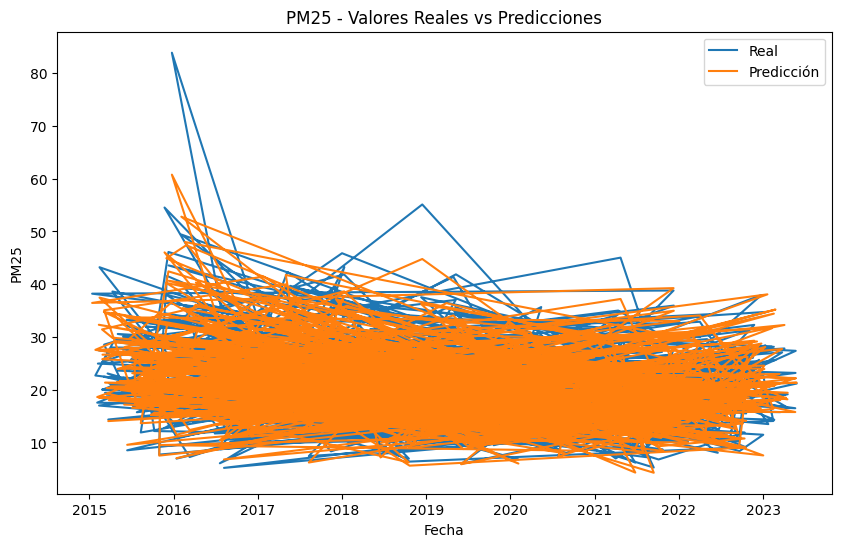

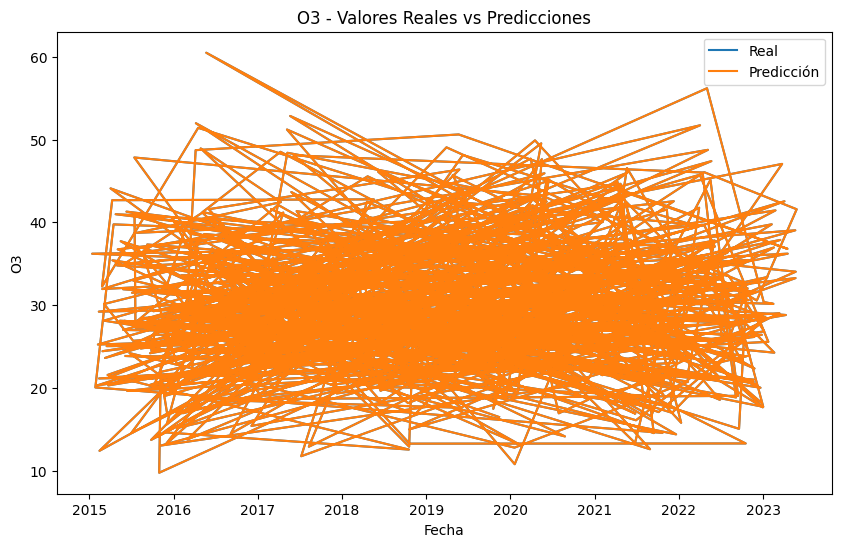

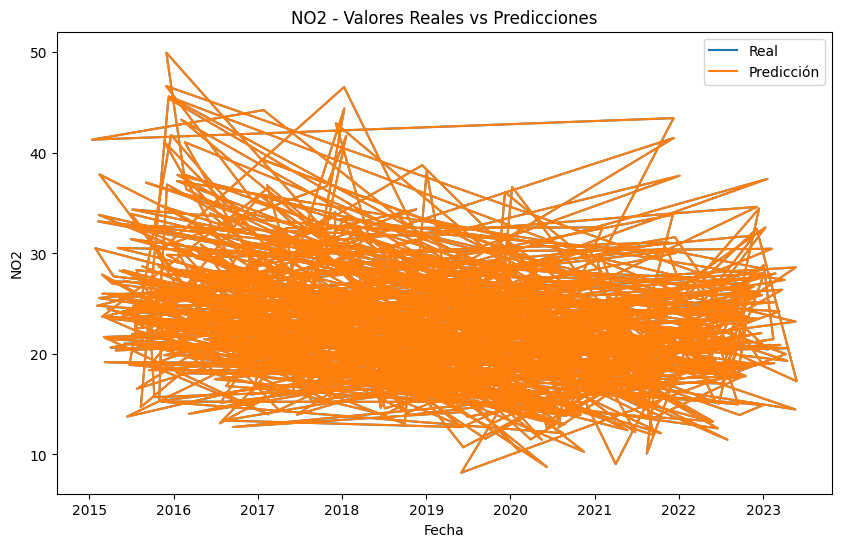

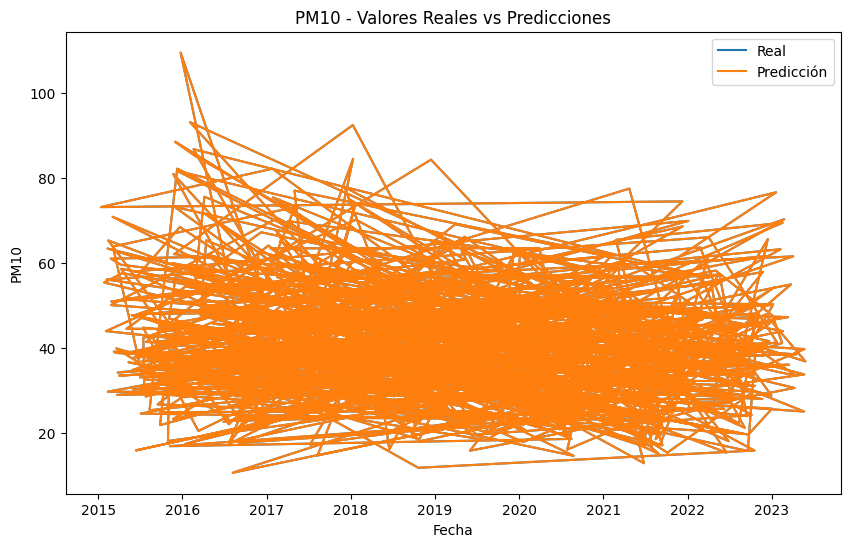

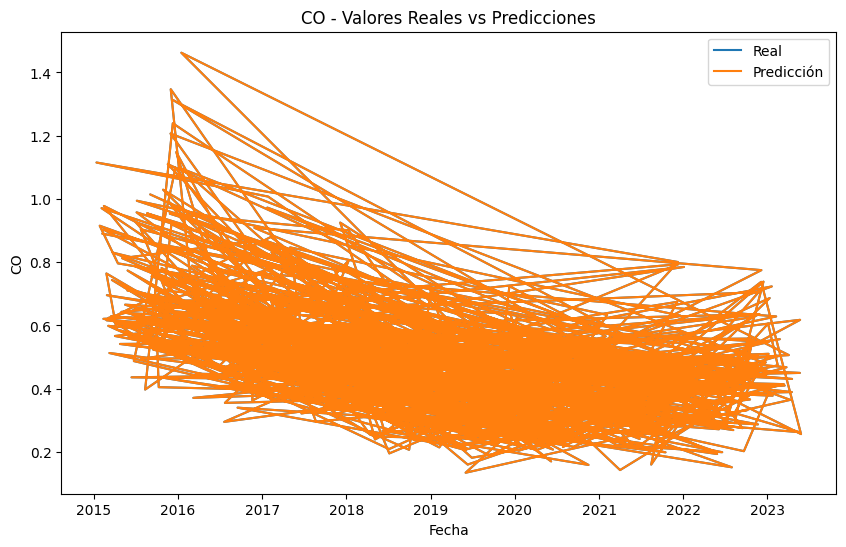

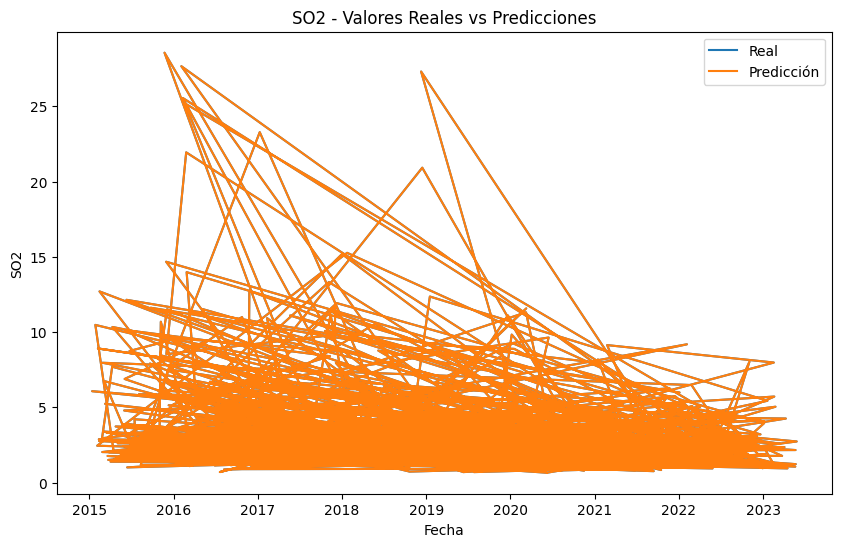

In [82]:
import matplotlib.pyplot as plt

# Suponiendo que y_test y y_pred son DataFrames con las mismas columnas (objetivos)
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']

# Suponiendo que y_test y y_pred tienen las mismas fechas en el índice
fechas = y_test.index

# Graficar cada objetivo por separado
for target in targets:
    plt.figure(figsize=(10, 6))
    plt.plot(fechas, y_test[target], label='Real')
    plt.plot(fechas, y_pred[:, targets.index(target)], label='Predicción')  # Acceder por índice numérico
    plt.title(f'{target} - Valores Reales vs Predicciones')
    plt.xlabel('Fecha')
    plt.ylabel(target)
    plt.legend()
    plt.show()


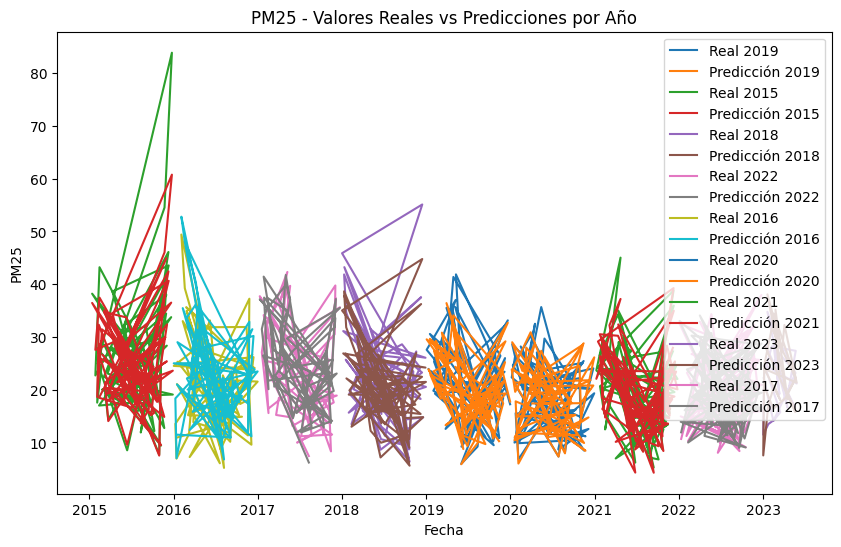

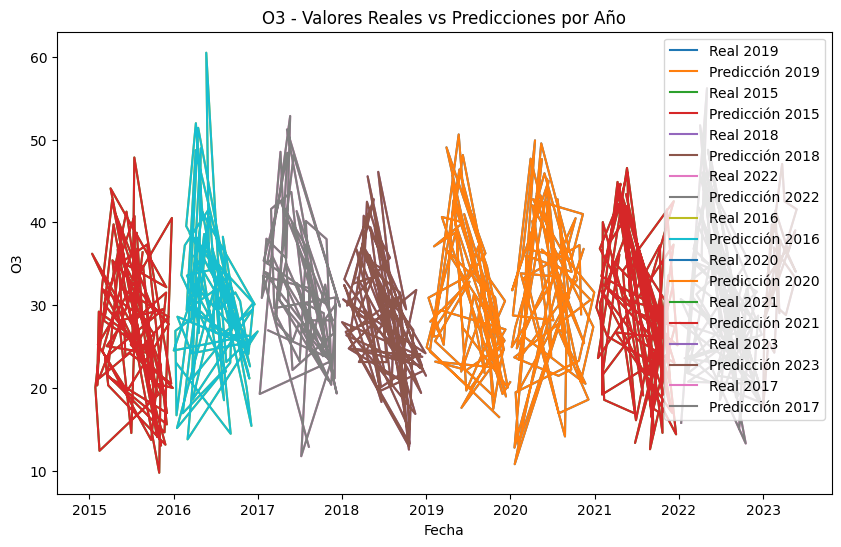

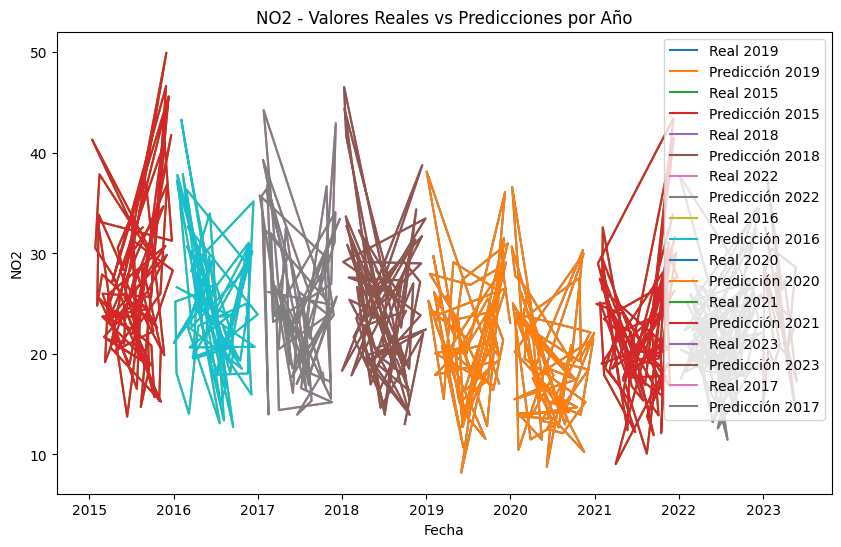

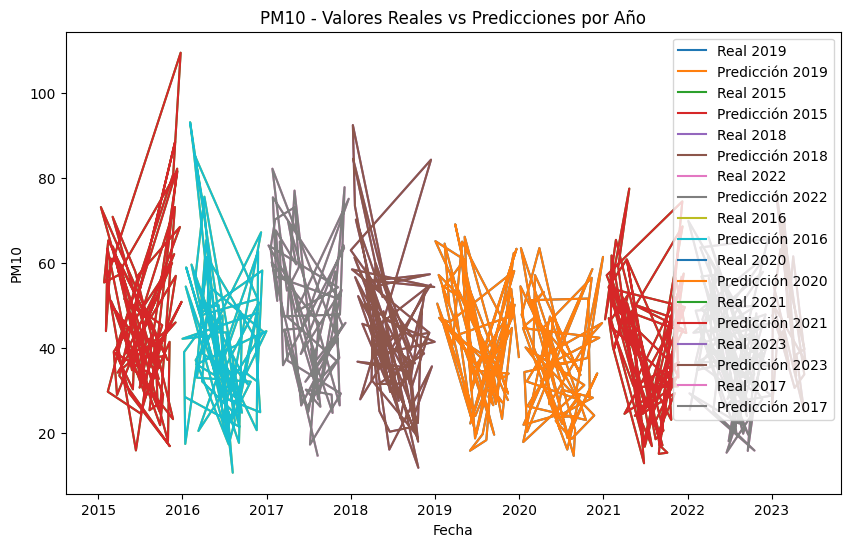

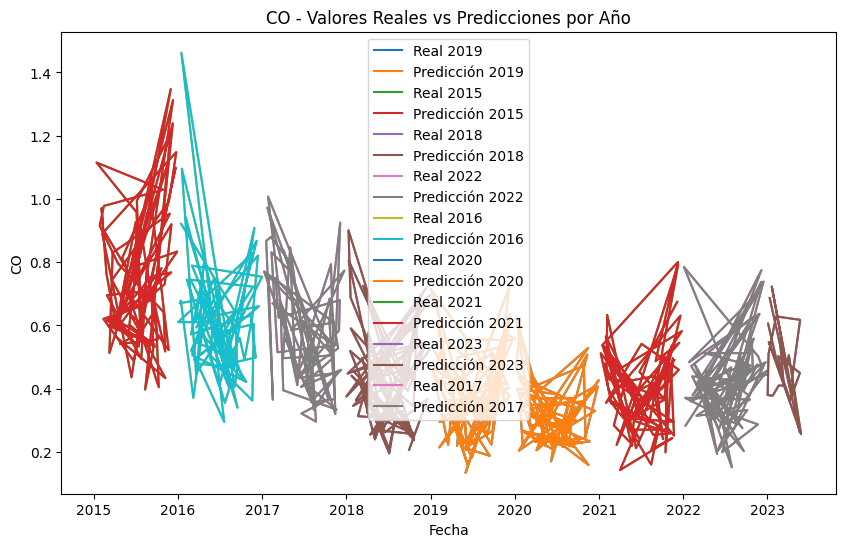

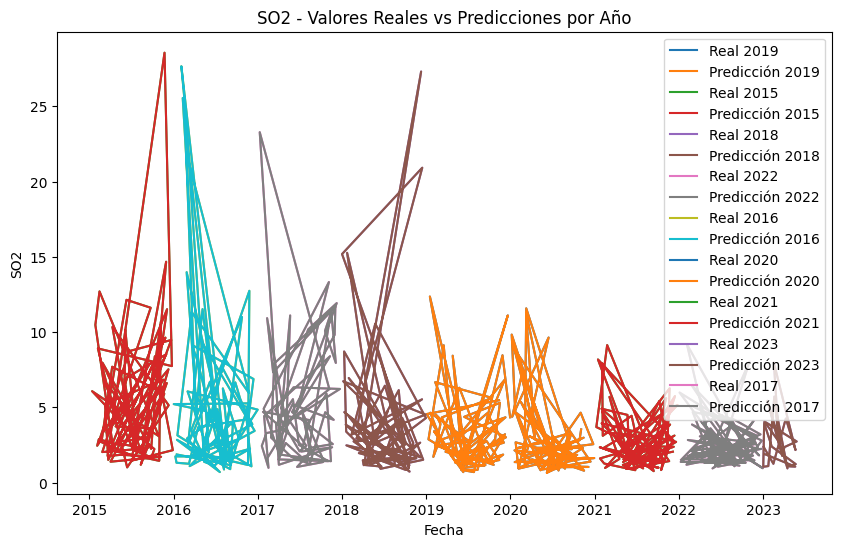

In [85]:
import matplotlib.pyplot as plt

# Agrupar por año y obtener las fechas
y_test['year'] = y_test.index.year

# Asegurar que y_pred tiene el mismo número de columnas que y_test original
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.drop(columns=['year']).columns)

# Obtener los años únicos
years = y_test['year'].unique()

# Graficar cada objetivo por año
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']

for target in targets:
    plt.figure(figsize=(10, 6))
    for year in years:
        y_test_year = y_test[y_test['year'] == year][target]
        y_pred_year = y_pred_df[y_test['year'] == year][target]
        plt.plot(y_test_year.index, y_test_year, label=f'Real {year}')
        plt.plot(y_test_year.index, y_pred_year, label=f'Predicción {year}')
    plt.title(f'{target} - Valores Reales vs Predicciones por Año')
    plt.xlabel('Fecha')
    plt.ylabel(target)
    plt.legend()
    plt.show()

# Eliminar la columna 'year' después de usarla para graficar
y_test.drop(columns=['year'], inplace=True)


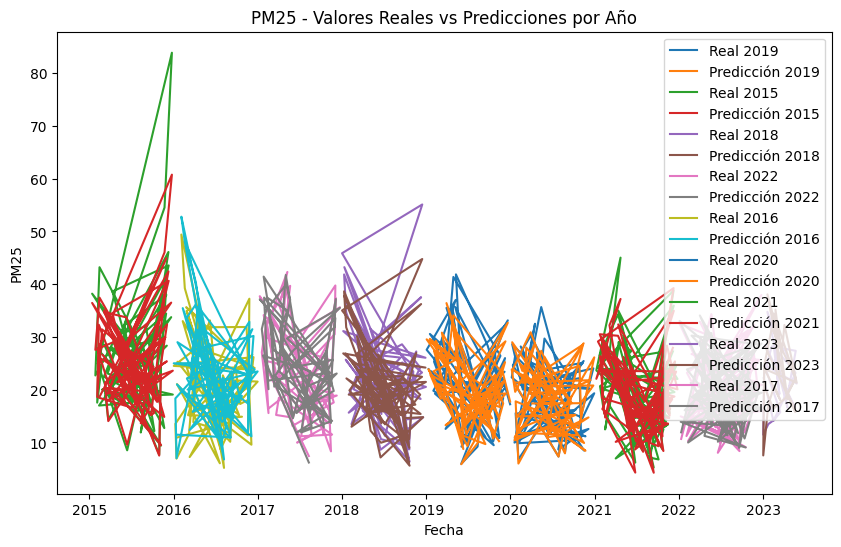

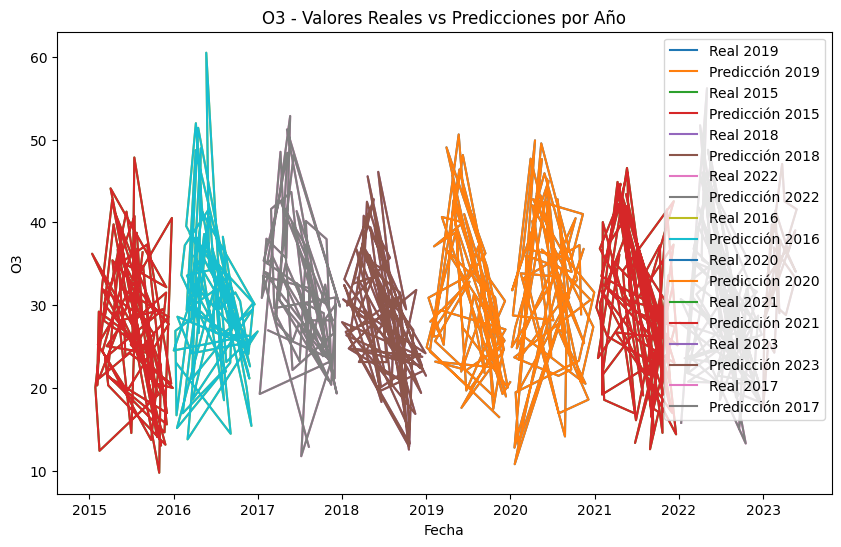

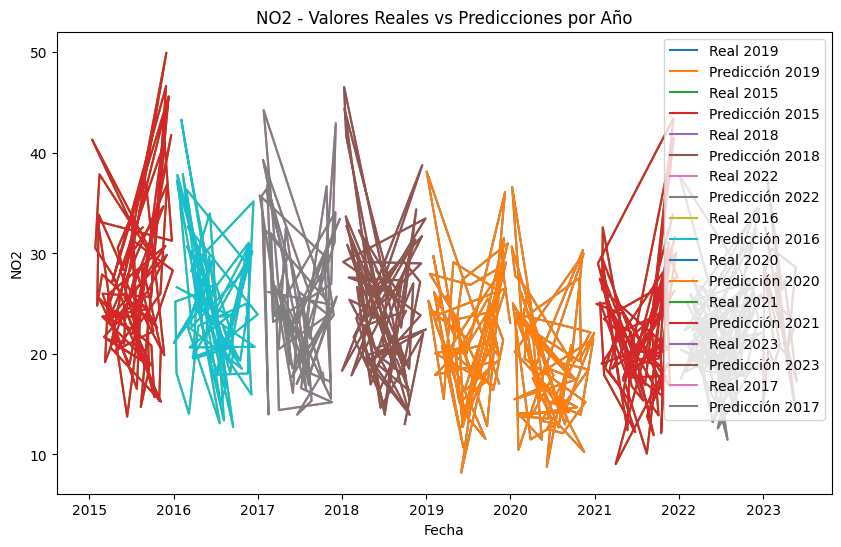

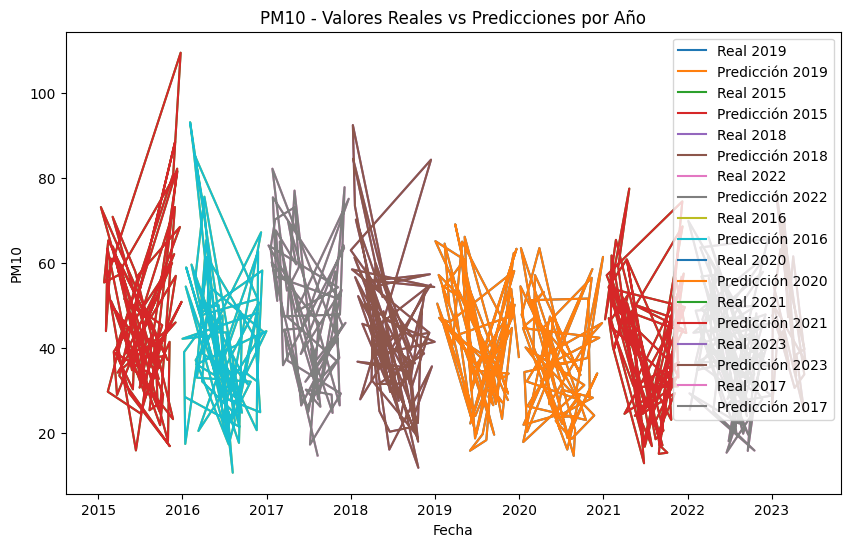

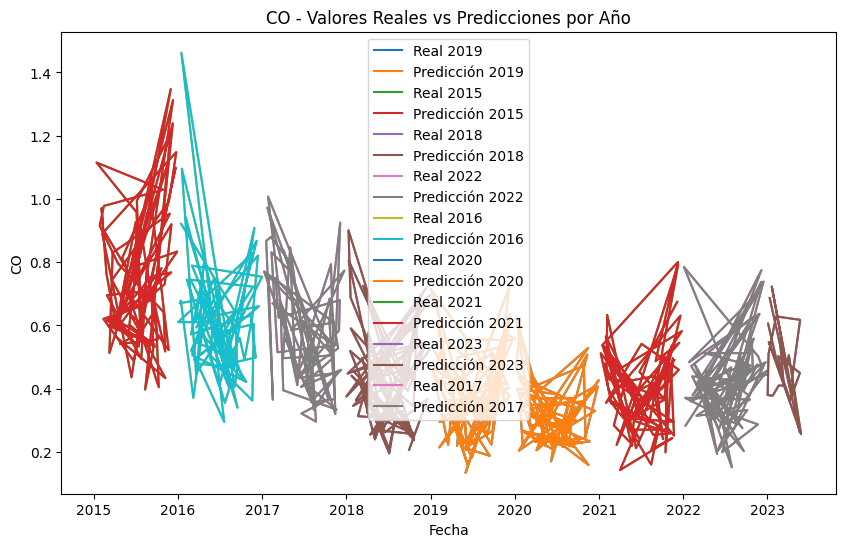

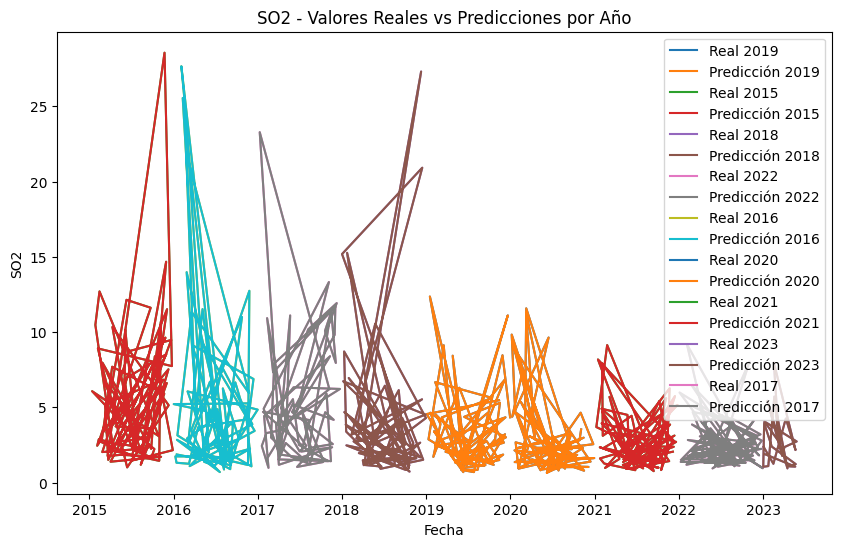

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que ya tienes y_test y y_pred correctamente definidos y con las predicciones

# Agrupar por año y obtener las fechas
y_test['year'] = y_test.index.year

# Asegurar que y_pred tiene el mismo número de columnas que y_test original
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.drop(columns=['year']).columns)

# Obtener los años únicos
years = y_test['year'].unique()

# Graficar cada variable por año
targets = ['PM25', 'O3', 'NO2', 'PM10', 'CO', 'SO2']

for target in targets:
    plt.figure(figsize=(10, 6))
    for year in years:
        y_test_year = y_test[y_test['year'] == year][target]
        y_pred_year = y_pred_df[y_test['year'] == year][target]
        plt.plot(y_test_year.index, y_test_year, label=f'Real {year}')
        plt.plot(y_test_year.index, y_pred_year, label=f'Predicción {year}')
    plt.title(f'{target} - Valores Reales vs Predicciones por Año')
    plt.xlabel('Fecha')
    plt.ylabel(target)
    plt.legend()
    plt.show()

# Eliminar la columna 'year' después de usarla para graficar
y_test.drop(columns=['year'], inplace=True)


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular las métricas para cada variable objetivo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

# Mostrar las métricas
for i, target in enumerate(targets):
    print(f"Metricas para {target}:")
    print(f"Mean Absolute Error (MAE): {mae[i]}")
    print(f"Root Mean Squared Error (RMSE): {rmse[i]}")
    print(f"R-squared (R2): {r2[i]}")
    print()


Metricas para PM25:
Mean Absolute Error (MAE): 2.5177437508643608
Root Mean Squared Error (RMSE): 3.394701559458962
R-squared (R2): 0.8482116127245469

Metricas para O3:
Mean Absolute Error (MAE): 1.5164233834553853e-14
Root Mean Squared Error (RMSE): 1.9222004607087777e-14
R-squared (R2): 1.0

Metricas para NO2:
Mean Absolute Error (MAE): 3.729480020078503e-15
Root Mean Squared Error (RMSE): 4.683340588494674e-15
R-squared (R2): 1.0

Metricas para PM10:
Mean Absolute Error (MAE): 1.3877606694759868e-14
Root Mean Squared Error (RMSE): 1.797973368958369e-14
R-squared (R2): 1.0

Metricas para CO:
Mean Absolute Error (MAE): 1.0060830182369893e-16
Root Mean Squared Error (RMSE): 1.3841971762184316e-16
R-squared (R2): 1.0

Metricas para SO2:
Mean Absolute Error (MAE): 2.6779376251398965e-15
Root Mean Squared Error (RMSE): 3.7901322393070105e-15
R-squared (R2): 1.0



In [91]:
umbral_pm25 = 45  # µg/m³

# Asumiendo que 'PM25' es la columna que contiene los valores de PM2.5 reales
merged_data['PM25_excede_umbral'] = merged_data['PM25'] > umbral_pm25

# Contar cuántas veces se supera el umbral
num_excesos = merged_data['PM25_excede_umbral'].sum()

# Calcular el porcentaje de días que superan el umbral
porcentaje_excesos = (num_excesos / len(merged_data)) * 100

print(f"Número de días que superan el umbral de {umbral_pm25} µg/m³: {num_excesos}")
print(f"Porcentaje de días que superan el umbral de {umbral_pm25} µg/m³: {porcentaje_excesos:.2f}%")


Número de días que superan el umbral de 45 µg/m³: 34
Porcentaje de días que superan el umbral de 45 µg/m³: 1.11%


In [96]:
# Define los umbrales para cada contaminante
umbral_CO = 400  # mg/m³ (8 horas)
umbral_NO2 = 200  # µg/m³ (1 hora)
umbral_O3 = 110  # µg/m³ (1 hora)
umbral_PM10 = 120  # µg/m³ (24 horas)
umbral_PM25 = 45  # µg/m³ (promedio diario)
umbral_SO2 = 100  # µg/m³ (1 hora)

# Filtra los datos para días que superan los umbrales
days_above_CO_threshold = merged_data[merged_data['CO'] > umbral_CO].shape[0]
days_above_NO2_threshold = merged_data[merged_data['NO2'] > umbral_NO2].shape[0]
days_above_O3_threshold = merged_data[merged_data['O3'] > umbral_O3].shape[0]
days_above_PM10_threshold = merged_data[merged_data['PM10'] > umbral_PM10].shape[0]
days_above_PM25_threshold = merged_data[merged_data['PM25'] > umbral_PM25].shape[0]
days_above_SO2_threshold = merged_data[merged_data['SO2'] > umbral_SO2].shape[0]

total_days = len(merged_data)

# Calcula el porcentaje de días que superan los umbrales
percent_above_CO_threshold = (days_above_CO_threshold / total_days) * 100
percent_above_NO2_threshold = (days_above_NO2_threshold / total_days) * 100
percent_above_O3_threshold = (days_above_O3_threshold / total_days) * 100
percent_above_PM10_threshold = (days_above_PM10_threshold / total_days) * 100
percent_above_PM25_threshold = (days_above_PM25_threshold / total_days) * 100
percent_above_SO2_threshold = (days_above_SO2_threshold / total_days) * 100

# Imprime los resultados
print(f"Días que superan el umbral de CO ({umbral_CO} mg/m³): {days_above_CO_threshold}")
print(f"Porcentaje de días que superan el umbral de CO: {percent_above_CO_threshold:.2f}%")

print(f"Días que superan el umbral de NO2 ({umbral_NO2} µg/m³): {days_above_NO2_threshold}")
print(f"Porcentaje de días que superan el umbral de NO2: {percent_above_NO2_threshold:.2f}%")

print(f"Días que superan el umbral de O3 ({umbral_O3} µg/m³): {days_above_O3_threshold}")
print(f"Porcentaje de días que superan el umbral de O3: {percent_above_O3_threshold:.2f}%")

print(f"Días que superan el umbral de PM10 ({umbral_PM10} µg/m³): {days_above_PM10_threshold}")
print(f"Porcentaje de días que superan el umbral de PM10: {percent_above_PM10_threshold:.2f}%")

print(f"Días que superan el umbral de PM25 ({umbral_PM25} µg/m³): {days_above_PM25_threshold}")
print(f"Porcentaje de días que superan el umbral de PM25: {percent_above_PM25_threshold:.2f}%")

print(f"Días que superan el umbral de SO2 ({umbral_SO2} µg/m³): {days_above_SO2_threshold}")
print(f"Porcentaje de días que superan el umbral de SO2: {percent_above_SO2_threshold:.2f}%")


Días que superan el umbral de CO (400 mg/m³): 0
Porcentaje de días que superan el umbral de CO: 0.00%
Días que superan el umbral de NO2 (200 µg/m³): 0
Porcentaje de días que superan el umbral de NO2: 0.00%
Días que superan el umbral de O3 (110 µg/m³): 0
Porcentaje de días que superan el umbral de O3: 0.00%
Días que superan el umbral de PM10 (120 µg/m³): 0
Porcentaje de días que superan el umbral de PM10: 0.00%
Días que superan el umbral de PM25 (45 µg/m³): 34
Porcentaje de días que superan el umbral de PM25: 1.11%
Días que superan el umbral de SO2 (100 µg/m³): 0
Porcentaje de días que superan el umbral de SO2: 0.00%
